In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.DataFrame(
    pd.read_csv(
        "../Datasets/FinalMergedDataset/cleaned_dataset.csv"
    )
)
df.head()

,Source,Destination,Flight Name,type,Status,Time,Actual_Time,Delay
0,Paris (CDG),Mumbai,Air France,A,0,2020-02-02 00:05:00,2020-02-02 00:48:00,43.0
1,Hyderabad (HYD),Mumbai,IndiGo,A,0,2020-02-02 00:05:00,2020-02-02 00:23:00,18.0
2,Mumbai,Delhi (DEL),GoAir,D,1,2020-02-02 00:05:00,2020-02-02 00:30:00,25.0
3,Mumbai,Delhi (DEL),AirAsia,D,1,2020-02-02 00:05:00,2020-02-02 00:55:00,50.0
4,Mumbai,Bangkok (BKK),Bangkok Airways (Guilin Livery),D,1,2020-02-02 00:05:00,2020-02-02 00:50:00,45.0


In [3]:
import datetime as dt
df["Source"] = LabelEncoder().fit_transform(df["Source"])
df["Destination"] = LabelEncoder().fit_transform(df["Destination"])
df["Flight Name"] = LabelEncoder().fit_transform(df["Flight Name"])
df["type"] = LabelEncoder().fit_transform(df["type"])
df["Time"] = pd.to_timedelta(pd.to_datetime(df["Time"])).dt.total_seconds()
df["Actual_Time"] = pd.to_timedelta(pd.to_datetime(df["Actual_Time"])).dt.total_seconds()

df.head()

C:\Users\2017j\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


,Source,Destination,Flight Name,type,Status,Time,Actual_Time,Delay
0,77,66,4,0,0,1.580602e+09,1.580604e+09,43.0
1,40,66,68,0,0,1.580602e+09,1.580603e+09,18.0
2,68,27,65,1,1,1.580602e+09,1.580603e+09,25.0
3,68,27,26,1,1,1.580602e+09,1.580605e+09,50.0
4,68,10,34,1,1,1.580602e+09,1.580605e+09,45.0


In [4]:

k=3
centroids = {
    i+1 : [np.random.randint(0,100) , np.random.randint(0,100)]
    for i in range(k)
}

In [5]:
import matplotlib.pyplot as plt 

x = df["Destination"]
y= df["Delay"]
colmap = {
    1 : 'r',
    2 : 'g',
    3 : 'b'
}

plt.scatter(x,y,color = "k")
for i in centroids.keys():
    plt.scatter(*centroids[i] , color = colmap[i])
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
def assignment(df,centroids):
    for i in centroids.keys():
        df["distance_from_{}".format(i)] = (
            np.sqrt(
                (x - centroids[i][0]) **2
                +
                (y - centroids[i][1]) **2
            )
        )
        
        centroid_distance_cols = ["distance_from_{}".format(i) for i in centroids.keys()]

        df["closest"] = df.loc[: , centroid_distance_cols].idxmin(axis = 1)
        df["closest"] = df["closest"].map(
            lambda x: int(x.lstrip("distance_from_"))
        )
        df["color"] = df["closest"].map(lambda x: colmap[x])
    return df        
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df["closest"] == i]["Destination"])
        centroids[i][1] = np.mean(df[df["closest"] == i]["Delay"])
    return k

C:\Users\2017j\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


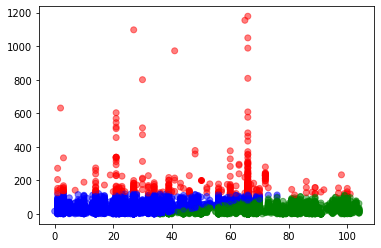

In [7]:
df = assignment(df,centroids)
while True:
    closest_centroids = df["closest"].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df["closest"]):
        break

plt.scatter(df["Destination"],df["Delay"],color = df["color"],alpha=0.5)

for i in centroids.keys():
    plt.scatter(*centroids[i] , color=colmap[i])
plt.show()